In [1]:
import pandas as pd
import numpy as np

raw = pd.read_csv('TCS0804.csv')

# drop index column
raw.drop(['Unnamed: 0'], axis=1, inplace=True)

In [2]:
target = 'MidReturn10Min'

# drop attributes collinear with the target
drop= ['MidReturn2Min', 'MidReturn4Min', 'MidReturn6Min', 'MidReturn8Min', 'MidReturn8Min', 'Return_10_Min', 'Return_1_Min', 'Return_3_Min','Return_20_Min', 'Return_60_Min', 'EpochTime']

### Cross sectional analysis

In [3]:
import data_context_map.pattern_miner as pm

out = pm.DataContextMap(raw.drop(drop, axis=1), dependent=target, es_thresh=0.55, minsup=0.005, max_pattern=100)
out.render()

Output()

Output()

Output()

### Time series analysis

#### There are noticeable gaps in EpochTime. I suspect these correpsond to different days.

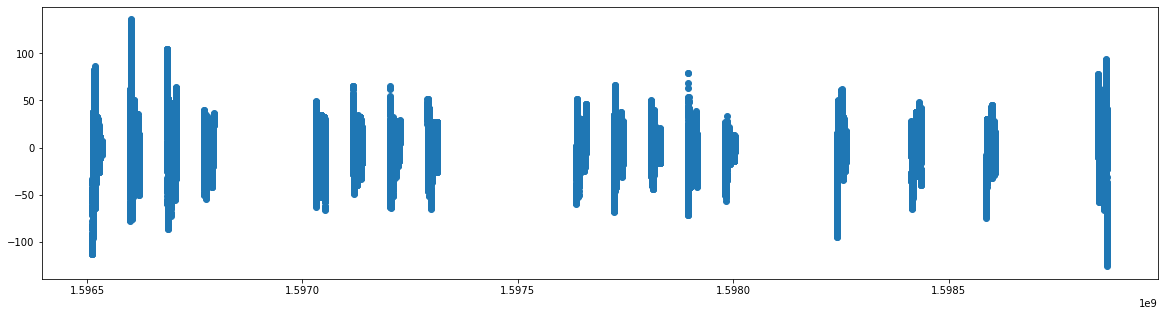

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

plt.scatter(raw['EpochTime'], raw[target])
plt.show()

#### We will assign all points in each section to the same 'Epoch'.

In [5]:
raw['Epoch'] = 0
t=1596550000
raw.loc[(raw['EpochTime']<t), 'Epoch'] = 0
raw.loc[(raw['EpochTime']>=t) & (raw['EpochTime']<t+100000), 'Epoch'] = 1
t += 100000
raw.loc[(raw['EpochTime']>=t) & (raw['EpochTime']<t+100000), 'Epoch'] = 2
t += 100000
raw.loc[(raw['EpochTime']>=t) & (raw['EpochTime']<t+100000), 'Epoch'] = 3

#t = 1597012711
tv = [1597000000, 1597100000, 1597150000, 1597250000, 1597350000]
t0 = tv[0]
t1 = tv[1]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 4

t0 = tv[1]
t1 = tv[2]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 5

t0 = tv[2]
t1 = tv[3]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 6

t0 = tv[3]
t1 = tv[4]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 7

tv = [1597500000, 1597700000, 1597800000, 1597850000, 1597950000, 1598200000]
t0 = tv[0]
t1 = tv[1]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 8

t0 = tv[1]
t1 = tv[2]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 9

t0 = tv[2]
t1 = tv[3]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 10

t0 = tv[3]
t1 = tv[4]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 11

t0 = tv[4]
t1 = tv[5]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 12


tv = [1598200000, 1598350000, 1598500000, 1598700000, 1600000000]
t0 = tv[0]
t1 = tv[1]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 13

t0 = tv[1]
t1 = tv[2]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 14

t0 = tv[2]
t1 = tv[3]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 15

t0 = tv[3]
t1 = tv[4]
raw.loc[(raw['EpochTime']>=t0) & (raw['EpochTime']<t1), 'Epoch'] = 16


In [6]:
import data_context_map.pattern_miner as pm

out = pm.DataContextMap(raw.drop(drop, axis=1), target, temporal='Epoch', min_stable=1, ts_width=1, es_thresh=0.7,  max_pattern=100)
out.render()

Output()

Output()

Output()

#### Perform correlation Mining

In [7]:
import data_context_map.correlation_miner as cm
ctab = cm.CorrelationTable(raw.drop(drop, axis=1), target, precompute=False, es_thresh=0.4, minsup=0.005, max_pattern=100)
ctab.render()

Output()

Output()